# Polynomial Fitting with Scikit-Learn

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x shape = (30,), y shape = (30,)


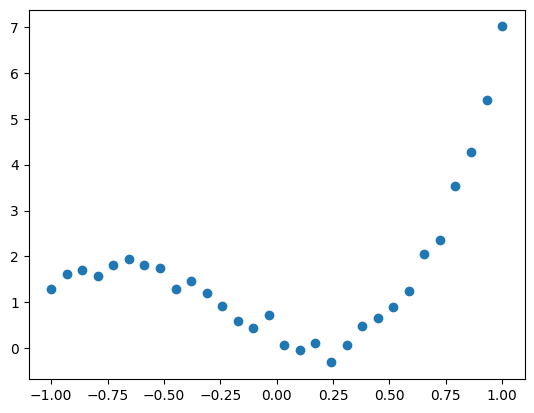

In [124]:
samples = 30

x = np.linspace(-1, 1, samples)
y = 5 * x**3 + 4 * x**2 - 2 * x - 0.5

# Input mean, standard_dev, and n_samples
noise = np.random.normal(0.65, 0.2, samples)
y += noise

print(f"x shape = {x.shape}, y shape = {y.shape}")
plt.scatter(x, y)

### Line of best fit (very bad)

MSE = 2.126838062603254


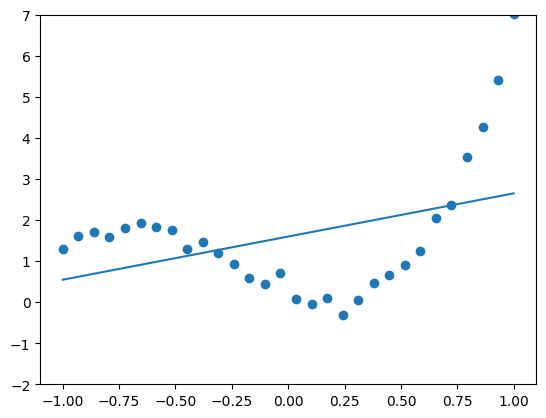

In [ ]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1, 1)
Y = y.reshape(-1, 1)


model = LinearRegression(fit_intercept=True)
model.fit(X, y)

y_hat = model.predict(X)

mse = np.mean((y - y_hat) ** 2)
print(f"MSE = {mse}")

plt.scatter(x, y)
plt.plot(X, y_hat)

## Polynomial Fitting

MSE for degree 3 = 0.023872018473378265
Weights for degree 3 = [ 0.         -2.07904565  3.77688794  4.88782139]


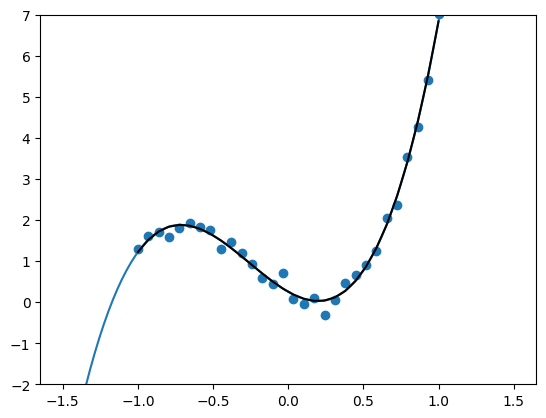

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

i = 3

poly = PolynomialFeatures(i)
design_matrix = poly.fit_transform(X)


model = LinearRegression(fit_intercept=True)
model.fit(design_matrix, y)

# Mean squared error
y_hat = model.predict(design_matrix)

mse = np.mean((y - y_hat) ** 2)

print(f"MSE for degree {i} = {mse}")
print(f"Weights for degree {i} = {model.coef_}")

# Line plotting
X_LINE = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)
DESIGN_LINE = poly.fit_transform(X_LINE)
Y_LINE = model.predict(DESIGN_LINE)

plt.plot(X_LINE, Y_LINE)

plt.ylim(-2, 7)
plt.scatter(x, y)
plt.plot(x, y_hat, color = "black")

## Trying training vs testing data split

Training MSE = 0.02668906544190716
Testing MSE = 0.012603830599262686


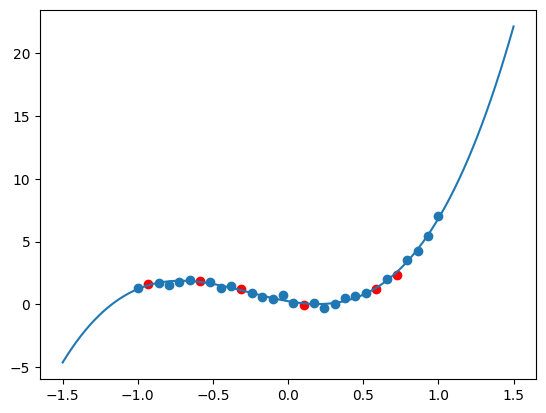

In [272]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

i = 3
poly = PolynomialFeatures(i)
design_matrix = poly.fit_transform(X)

# Data split

X_train, X_test, y_train, y_test = train_test_split(design_matrix, y, test_size = 0.2)


model = LinearRegression(fit_intercept=False)
model.fit(design_matrix, y)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print(f"Training MSE = {np.mean((y_train - y_hat_train) ** 2)}")

print(f"Testing MSE = {np.mean((y_test - y_hat_test) ** 2)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

plt.plot(X_LINE, Y_LINE)

plt.scatter(X_train, y_train)

plt.scatter(X_test, y_test, color = "red")